# 1.scikit-learn algorithm 
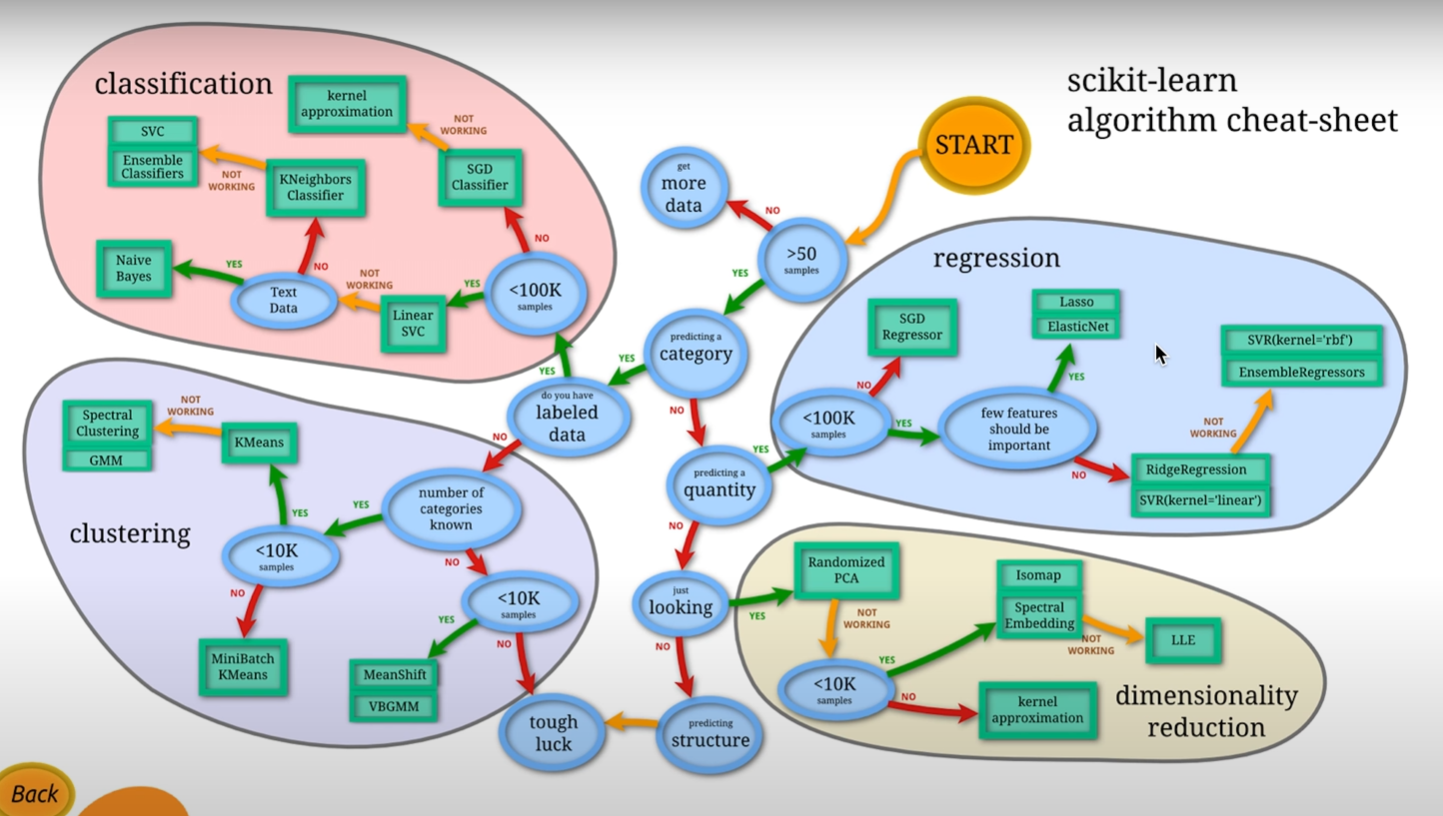

scikit-learn이란 python을 대표하는 머신러닝 라이브러리이다. '사이킷런'이라고 부르기도 한다. scikit-learn은 오픈 소스로 공개되어 있으며, 개인, 비즈니스 관계없이 누구나 무료로 사용가능하다. scikit-learn은 현재도 활용하여 개발이 이루어지고 있으며, 인터넷 상에서 정보를 찾기에도 싶다. 많은 머신러닝 알고리즘이 구현되어 있는데, 어떤 알고리즘도 같은 방식으로 이용이 가능하다. 또, 샘플 데이터 셋(토이 데이터 셋)이 부속되어 있으므로, 설치하여 바로 기계 학습을 시험해볼 수 있다. 그러므로 초심자가 기계학습을 배우기 시작할 때 적합한 라이브러리라고 말한다.




scikit-learn을 사용한 프로그램은 기본적으로 아래의 구성이다.

​

1) 라이브러리 임포트

2) 학습 데이터나 테스트 데이터 준비

3) 알고리즘 지정과 학습 실행

4) 테스트 데이터로 테스트

5) 필요에 따라 정밀도 등을 시각화





# 2. RMSLE
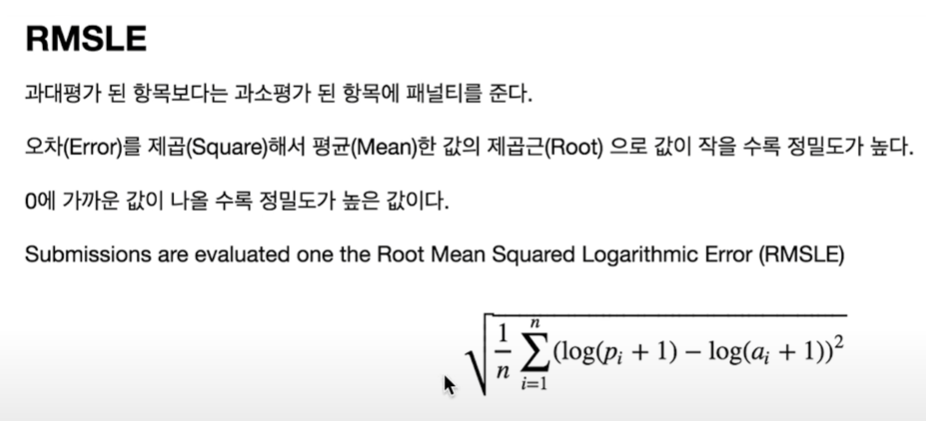

# 3.Cross Validation 교차 검증

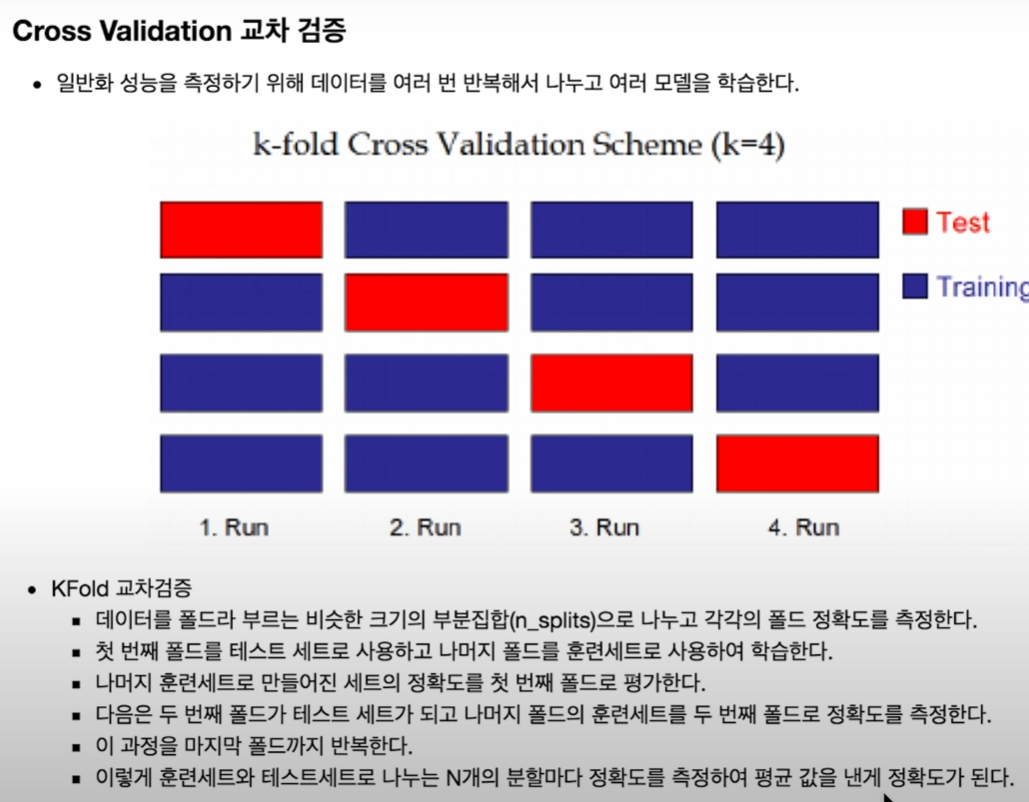

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [3]:
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])
test.shape

(6493, 9)

In [4]:
# 전체적인 액셀 데이터 확인하기
display(train)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
display(test)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


# Feature Engineering

In [6]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [7]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 16)

<AxesSubplot:title={'center':'test windspeed'}, xlabel='windspeed', ylabel='count'>

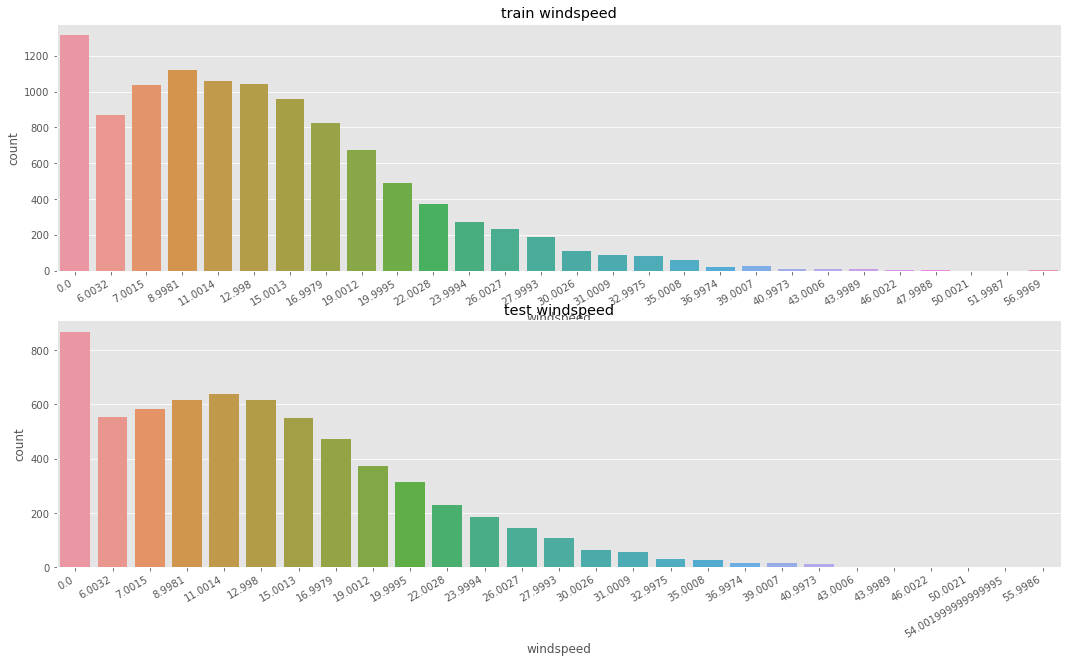

In [8]:
# widspeed 풍속에 0 값이 가장 많다. => 잘못 기록된 데이터를 고쳐 줄 필요가 있음
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count',title="test windspeed")
sns.countplot(data=test, x="windspeed", ax=axes[1])

In [9]:
# 풍속의 0값에 특정 값을 넣어준다.
# 평균을 구해 일괄적으로 넣어줄 수도 있지만, 예측의 정확도를 높이는 데 도움이 될것 같진 않다.
# train.loc[train["windspeed"] == 0, "windspeed"] = train["windspeed"].mean()
# test.loc[train["windspeed"] == 0, "windspeed"] = train["windspeed"].mean()

In [10]:

# 풍속이 0인것과 아닌 것의 세트를 나누어 준다.
trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]
print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 19)
(9573, 19)


# 4. 랜덤 포레스트(Random Forest) 활용하여 예측하기

랜덤 포레스트의 개념은 쉽습니다. 랜덤 포레스트의 포레스트는 숲(Forest)입니다. 결정 트리는 트리는 나무(Tree)입니다. 나무가 모여 숲을 이룹니다. 즉, 결정 트리(Decision Tree)가 모여 랜덤 포레스트(Random Forest)를 구성합니다. 결정 트리 하나만으로도 머신러닝을 할 수 있습니다. 하지만 결정 트리의 단점은 훈련 데이터에 오버피팅이 되는 경향이 있다는 것입니다. 여러 개의 결정 트리를 통해 랜덤 포레스트를 만들면 오버피팅 되는 단점을 해결할 수 있습니다.

## 원리

랜덤 포레스트의 예를 들어 보겠습니다. 건강의 위험도를 예측하기 위해서는 많은 요소를 고려해야 합니다. 성별, 키, 몸무게, 지역, 운동량, 흡연유무, 음주 여부, 혈당, 근육량, 기초 대사량 등등등... 수많은 요소가 필요할 것입니다. 이렇게 수많은 요소(Feature)를 기반으로 건강의 위험도(Label)를 예측한다면 분명 오버피팅이 일어날 것입니다. 예를 들어 Feature가 30개라고 합시다. 30개의 Feature를 기반으로 하나의 결정 트리를 만든다면 트리의 가지가 많아질 것이고, 이는 오버피팅의 결과를 야기할 것입니다. 하지만 30개의 Feature 중 랜덤으로 5개의 Feature만 선택해서 하나의 결정 트리를 만들고, 또 30개 중 랜덤으로 5개의 Feature를 선택해서 또 다른 결정 트리를 만들고... 이렇게 계속 반복하여 여러 개의 결정 트리를 만들 수 있습니다. 결정 트리 하나마다 예측 값을 내놓겠죠. 여러 결정 트리들이 내린 예측 값들 중 가장 많이 나온 값을 최종 예측값으로 정합니다. 다수결의 원칙에 따르는 것입니다. 이렇게 의견을 통합하거나 여러 가지 결과를 합치는 방식을 앙상블(Ensemble)이라고 합니다. 즉, 하나의 거대한 (깊이가 깊은) 결정 트리를 만드는 것이 아니라 여러 개의 작은 결정 트리를 만드는 것입니다. 여러 개의 작은 결정 트리가 예측한 값들 중 가장 많은 값(분류일 경우) 혹은 평균값(회귀일 경우)을 최종 예측 값으로 정하는 것입니다. 문제를 풀 때도 한 명의 똑똑한 사람보다 100 명의 평범한 사람이 더 잘 푸는 원리입니다.

## 파라미터

n_estimators: 랜덤 포레스트 안의 결정 트리 갯수

n_estimators는 클수록 좋습니다. 결정 트리가 많을수록 더 깔끔한 Decision Boundary가 나오겠죠. 하지만 그만큼 메모리와 훈련 시간이 증가합니다.

max_features: 무작위로 선택할 Feature의 개수

max_features가 전체 Feature 개수와 같으면 전체 Feature 모두를 사용해 결정 트리를 만듭니다. boostrap 파라미터가 False이면 비복원 추출하기 때문에 그냥 전체 Feature를 사용해 트리를 만듭니다. 반면 bootstrap=True이면 전체 Feature에서 복원 추출해서 트리를 만듭니다. 단, bootstrap=True는 default 값입니다. max_features 값이 크면 랜덤 포레스트의 트리들이 매우 비슷해지고, 가장 두드러진 특성에 맞게 예측을 할 것입니다. max_features 값이 작으면 랜덤 포레스트의 트리들이 서로 매우 달라집니다. 오버피팅이 줄어드는 효과가 있겠죠. max_features는 일반적으로 Defalut 값을 씁니다.

In [11]:
# 그래서 머신러닝으로 예측을 해서 풍속을 넣어주도록 한다.
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    # 풍속이 0인것과 아닌 것을 나누어 준다.
    dataWind0 = data.loc[data['windspeed'] == 0]
    dataWindNot0 = data.loc[data['windspeed'] != 0]
    
    # 풍속을 예측할 피처를 선택한다.
    wCol = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]

    # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")

    # 랜덤포레스트 분류기를 사용한다.
    rfModel_wind = RandomForestClassifier()

    # wCol에 있는 피처의 값을 바탕으로 풍속을 학습시킨다.
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])

    # 학습한 값을 바탕으로 풍속이 0으로 기록 된 데이터의 풍속을 예측한다.
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])

    # 값을 다 예측 후 비교해 보기 위해
    # 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0

    # 값이 0으로 기록 된 풍속에 대해 예측한 값을 넣어준다.
    predictWind0["windspeed"] = wind0Values

    # dataWindNot0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을 합쳐준다.
    data = predictWindNot0.append(predictWind0)

    # 풍속의 데이터타입을 float으로 지정해 준다.
    data["windspeed"] = data["windspeed"].astype("float")

    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    
    return data

<AxesSubplot:title={'center':'train windspeed'}, xlabel='windspeed', ylabel='count'>

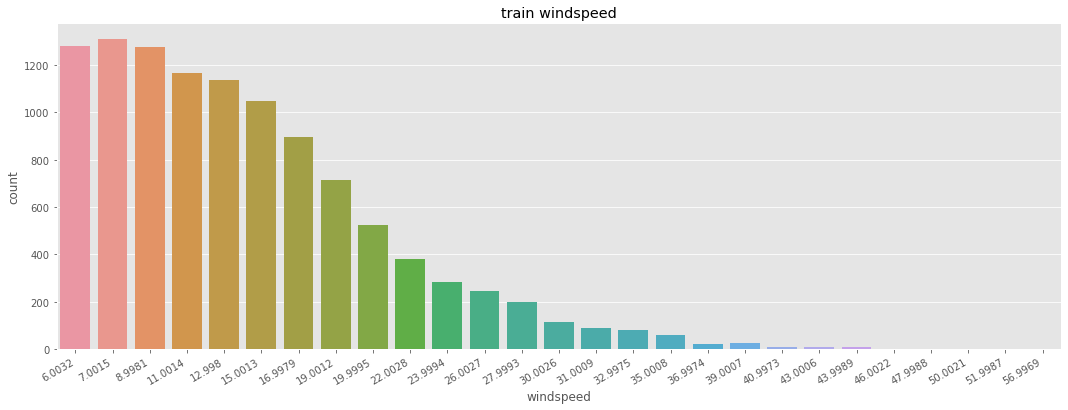

In [12]:
# 0값을 조정한다.
train = predict_windspeed(train)
# test = predict_windspeed(test)

# widspeed 의 0값을 조정한 데이터를 시각화
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=ax1)

# Feature Selection
- 신호와 잡음을 구분해야 한다.
- 피처가 많다고 해서 무조건 좋은 성능을 내지 않는다.
- 피처를 하나씩 추가하고 변경해 가면서 성능이 좋지 않은 피처는 제거하도록 한다.

In [13]:
# 연속형 feature와 범주형 feature 
# 연속형 feature = ["temp","humidity","windspeed","atemp"]
# 범주형 feature의 type을 category로 변경 해 준다.
categorical_feature_names = ["season","holiday","workingday","weather",
                             "dayofweek","month","year","hour"]

for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [14]:
feature_names = ["season", "weather", "temp", "atemp", "humidity", "windspeed",
                 "year", "hour", "dayofweek", "holiday", "workingday"]

feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [15]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   weather     10886 non-null  category
 2   temp        10886 non-null  float64 
 3   atemp       10886 non-null  float64 
 4   humidity    10886 non-null  int64   
 5   windspeed   10886 non-null  float64 
 6   year        10886 non-null  category
 7   hour        10886 non-null  category
 8   dayofweek   10886 non-null  category
 9   holiday     10886 non-null  category
 10  workingday  10886 non-null  category
dtypes: category(7), float64(3), int64(1)
memory usage: 416.6 KB


In [17]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [29]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      6493 non-null   category
 1   weather     6493 non-null   category
 2   temp        6493 non-null   float64 
 3   atemp       6493 non-null   float64 
 4   humidity    6493 non-null   int64   
 5   windspeed   6493 non-null   float64 
 6   year        6493 non-null   category
 7   hour        6493 non-null   category
 8   dayofweek   6493 non-null   category
 9   holiday     6493 non-null   category
 10  workingday  6493 non-null   category
dtypes: category(7), float64(3), int64(1)
memory usage: 249.3 KB


In [18]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

# RMSLE

In [19]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

# Cross Validation 교차 검증

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# RandomForest

In [21]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model

RandomForestRegressor(n_jobs=-1, random_state=0)

In [22]:
%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

Wall time: 13.1 s
Score= 0.33083


# Train

In [23]:
# 학습시킴, 피팅(옷을 맞출 때 사용하는 피팅을 생각함) - 피처와 레이블을 넣어주면 알아서 학습을 함
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [24]:
# 예측
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]

(6493,)


array([ 12.74,   5.16,   3.98,   3.68,   3.3 ,   6.42,  38.32, 104.82,
       236.59, 136.14])

[Text(0.5, 1.0, 'test')]

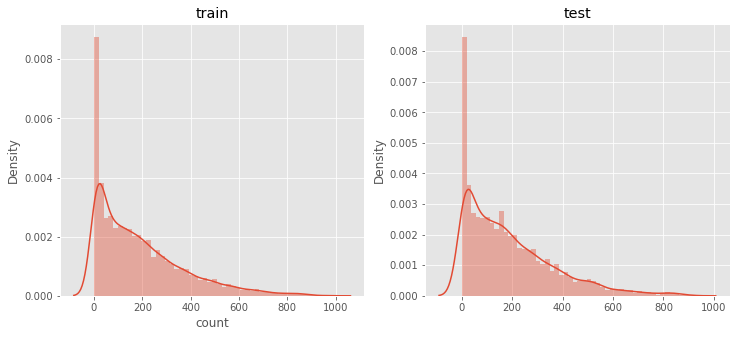

In [25]:
# 예측한 데이터를 시각화 해본다. 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

# Submit

In [26]:
submission = pd.read_csv("data/sampleSubmission.csv")
submission

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.74
1,2011-01-20 01:00:00,5.16
2,2011-01-20 02:00:00,3.98
3,2011-01-20 03:00:00,3.68
4,2011-01-20 04:00:00,3.30


In [27]:
submission.to_csv("data/Score_{0:.5f}_submission.csv".format(score), index=False)